<a href="https://colab.research.google.com/github/Neeshi14/Business-analysis-of-the-Retail-/blob/main/RetailBusinessAnaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

firstly we create the fake dataset of the Retail Business .

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Define dataset size
num_samples = 10000

# Generate Customer Details
customer_ids = np.arange(1001, 1001 + num_samples)
ages = np.random.randint(18, 65, size=num_samples)
genders = np.random.choice(["Male", "Female"], size=num_samples, p=[0.55, 0.45])
cities = np.random.choice([
    "New York", "Los Angeles", "Chicago", "Houston", "Miami",
    "Dallas", "San Francisco", "Seattle", "Boston", "Denver"
], size=num_samples)

# Define Product Categories and Price Ranges
categories = np.random.choice([
    "Electronics", "Clothing", "Groceries", "Furniture", "Toys",
    "Books", "Sports", "Beauty", "Automobile", "Jewelry"
], size=num_samples)

price_ranges = {
    "Electronics": (300, 5000),
    "Clothing": (20, 500),
    "Groceries": (5, 200),
    "Furniture": (100, 3000),
    "Toys": (10, 500),
    "Books": (5, 100),
    "Sports": (50, 2000),
    "Beauty": (10, 500),
    "Automobile": (500, 7000),
    "Jewelry": (100, 10000)
}

purchase_amounts = [np.random.uniform(*price_ranges[cat]) for cat in categories]

# Generate Random Dates Over the Past 2 Years
purchase_dates = [datetime.today() - timedelta(days=np.random.randint(0, 730)) for _ in range(num_samples)]

# Create DataFrame
df_retail = pd.DataFrame({
    "Customer_ID": customer_ids,
    "Age": ages,
    "Gender": genders,
    "City": cities,
    "Category": categories,
    "Purchase_Amount": np.round(purchase_amounts, 2),
    "Purchase_Date": purchase_dates
})

# Save dataset to CSV
df_retail.to_csv("retail_business_dataset.csv", index=False)

# Display first few rows
df_retail.head()


,Customer_ID,Age,Gender,City,Category,Purchase_Amount,Purchase_Date
0,1001,56,Male,Dallas,Sports,796.30,2024-02-09 09:40:56.690852
1,1002,46,Male,Houston,Clothing,414.63,2024-05-30 09:40:56.690944
2,1003,32,Female,Boston,Electronics,4018.38,2024-11-15 09:40:56.690963
3,1004,60,Male,Boston,Toys,491.73,2023-07-23 09:40:56.690973
4,1005,25,Male,Chicago,Beauty,237.95,2024-11-22 09:40:56.690981


# Retail Business Data Analysis

These is my Retail Business data.

Dataset Details:

Customer_ID: Unique customer identifier

Age: Customer’s age (18-65)

Gender: Male/Female (55% Male, 45% Female)

City: 10 retail locations across the US

Category: 10 product categories

Electronics, Clothing, Groceries, Furniture, Toys, Books, Sports, Beauty, Automobile, Jewelry

Purchase_Amount: Realistic prices based on product category

Purchase_Date: Randomized over the last 2 years



## Data loading

Load the "retail_business_dataset.csv" file into a Pandas DataFrame.


In [ ]:
import pandas as pd

df = pd.read_csv('retail_business_dataset.csv')
df.head()

,Customer_ID,Age,Gender,City,Category,Purchase_Amount,Purchase_Date
0,1001,56,Male,Dallas,Sports,796.30,2024-02-09 09:40:56.690852
1,1002,46,Male,Houston,Clothing,414.63,2024-05-30 09:40:56.690944
2,1003,32,Female,Boston,Electronics,4018.38,2024-11-15 09:40:56.690963
3,1004,60,Male,Boston,Toys,491.73,2023-07-23 09:40:56.690973
4,1005,25,Male,Chicago,Beauty,237.95,2024-11-22 09:40:56.690981


In [ ]:
df['Month'] = pd.to_datetime(df['Purchase_Date']).dt.month
df['Average_Purchase_Amount_per_Month'] = df.groupby('Month')['Purchase_Amount'].transform('mean')
df.head()

,Customer_ID,Age,Gender,City,Category,Purchase_Amount,Purchase_Date,Month,Average_Purchase_Amount_per_Month
0,1001,56,Male,Dallas,Sports,796.30,2024-02-09 09:40:56.690852,2,1558.103185
1,1002,46,Male,Houston,Clothing,414.63,2024-05-30 09:40:56.690944,5,1445.265356
2,1003,32,Female,Boston,Electronics,4018.38,2024-11-15 09:40:56.690963,11,1615.853570
3,1004,60,Male,Boston,Toys,491.73,2023-07-23 09:40:56.690973,7,1549.535749
4,1005,25,Male,Chicago,Beauty,237.95,2024-11-22 09:40:56.690981,11,1615.853570


## Data exploration

Explore the dataset stored in the DataFrame `df`.



Perform initial exploration of the dataset including shape, info, descriptive statistics, missing values, and unique value counts for categorical columns.



In [ ]:
# Check the shape of the DataFrame.
print("DataFrame Shape:")
df.shape

DataFrame Shape:


(10000, 9)

In [ ]:
# Get a summary of the DataFrame.
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_ID                        10000 non-null  int64  
 1   Age                                10000 non-null  int64  
 2   Gender                             10000 non-null  object 
 3   City                               10000 non-null  object 
 4   Category                           10000 non-null  object 
 5   Purchase_Amount                    10000 non-null  float64
 6   Purchase_Date                      10000 non-null  object 
 7   Month                              10000 non-null  int32  
 8   Average_Purchase_Amount_per_Month  10000 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 664.2+ KB


In [ ]:
# Calculate descriptive statistics for numerical columns.
print("\nDescriptive Statistics for Numerical Columns:")
df.describe()


Descriptive Statistics for Numerical Columns:


,Customer_ID,Age,Purchase_Amount,Month,Average_Purchase_Amount_per_Month
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6000.50000,41.054000,1501.701561,6.456600,1501.701561
std,2886.89568,13.484104,2051.268047,3.436087,73.401088
min,1001.00000,18.000000,5.020000,1.000000,1367.151608
25%,3500.75000,30.000000,139.310000,3.000000,1445.265356
50%,6000.50000,41.000000,453.660000,6.000000,1504.116916
75%,8500.25000,53.000000,2104.132500,9.000000,1558.103185
max,11000.00000,64.000000,9991.850000,12.000000,1615.853570


In [ ]:
# Identify the number of missing values for each column.
print("\nNumber of Missing Values per Column:")
df.isnull().sum()


Number of Missing Values per Column:


,0
Customer_ID,0
Age,0
Gender,0
City,0
Category,0
Purchase_Amount,0
Purchase_Date,0
Month,0
Average_Purchase_Amount_per_Month,0


In [ ]:
# Explore the unique values and their counts for categorical columns.
print("\nUnique Values and Counts for Categorical Columns:")
for column in ['Gender', 'City', 'Category']:
  print(f"\nUnique values for {column}:")
  display(df[column].value_counts())


Unique Values and Counts for Categorical Columns:

Unique values for Gender:


,count
Gender,
Male,5476
Female,4524



Unique values for City:


,count
City,
Miami,1068
Chicago,1024
San Francisco,1008
Houston,1006
Boston,993
Denver,991
Dallas,984
Seattle,983
New York,980



Unique values for Category:


,count
Category,
Sports,1070
Furniture,1041
Jewelry,1040
Books,1039
Automobile,1003
Toys,988
Beauty,983
Clothing,953
Electronics,947


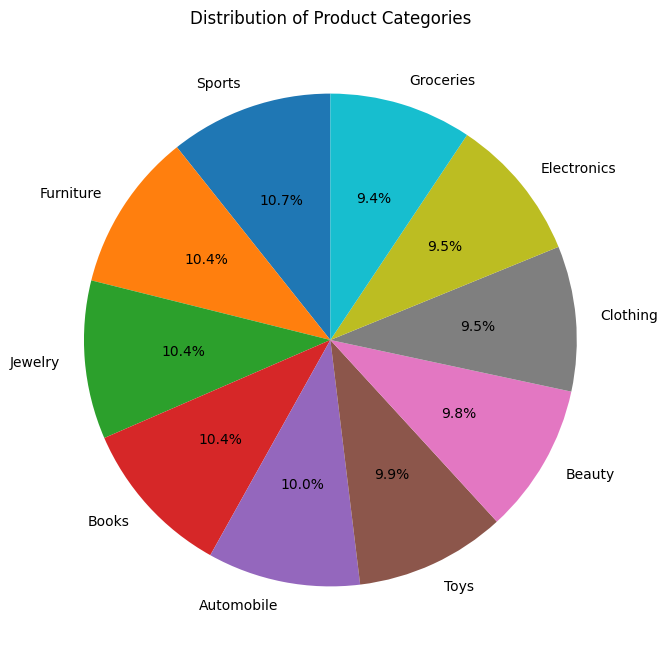

In [ ]:
category_counts = df['Category'].value_counts()
import matplotlib.pyplot as plt

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Product Categories')
plt.show()

## Data analysis

Analyze the distribution of key variables like sales, profits, customer demographics, and product categories.


Analyze the distribution of `Purchase_Amount` by calculating its descriptive statistics and creating a histogram and box plot to visualize its distribution.



<ipython-input-10-9342c4a11cf9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = pd.to_datetime(filtered_df['Purchase_Date']).dt.month
<ipython-input-10-9342c4a11cf9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Average_Purchase_Amount_per_Month'] = filtered_df.groupby('Month')['Purchase_Amount'].transform('mean')


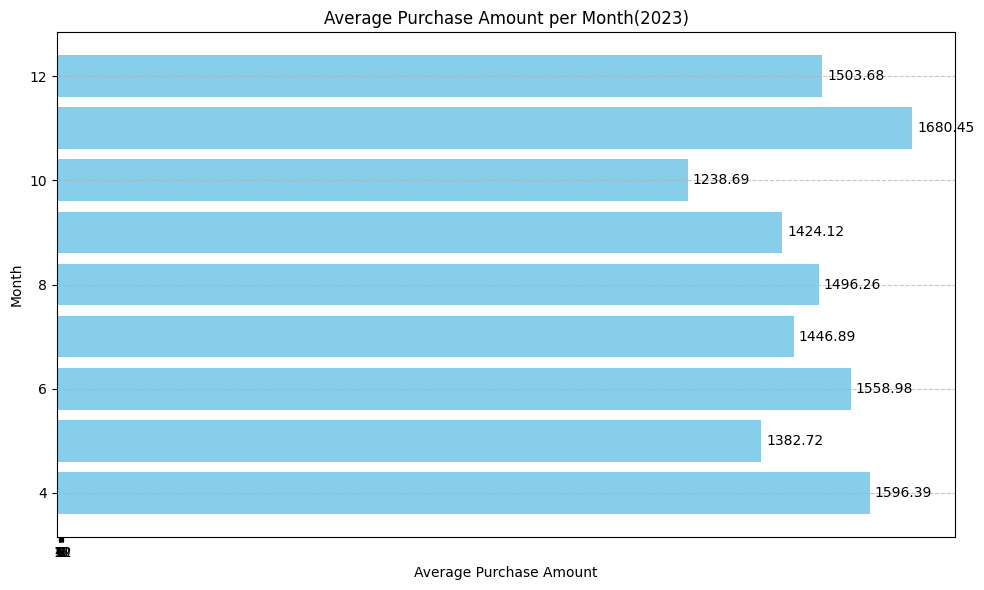

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Purchase_Date' is a datetime column in your DataFrame
df['Purchase_Year'] = pd.to_datetime(df['Purchase_Date']).dt.year  # Extract purchase year
desired_year = 2023  # Change to your desired year

filtered_df = df[df['Purchase_Year'] == desired_year]  # Filter data for the desired year

# Now calculate the monthly average for the filtered data
filtered_df['Month'] = pd.to_datetime(filtered_df['Purchase_Date']).dt.month
filtered_df['Average_Purchase_Amount_per_Month'] = filtered_df.groupby('Month')['Purchase_Amount'].transform('mean')

monthly_avg_purchase = filtered_df.groupby('Month')['Average_Purchase_Amount_per_Month'].mean()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
bars=plt.barh(monthly_avg_purchase.index, monthly_avg_purchase.values, color='skyblue')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Month')
plt.title('Average Purchase Amount per Month(2023)')
plt.xticks(monthly_avg_purchase.index)  # Set x-axis ticks to month numbers
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
# Add value labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')
plt.tight_layout()
plt.show()

<ipython-input-11-2d5b07120398>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = pd.to_datetime(filtered_df['Purchase_Date']).dt.month
<ipython-input-11-2d5b07120398>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Average_Purchase_Amount_per_Month'] = filtered_df.groupby('Month')['Purchase_Amount'].transform('mean')


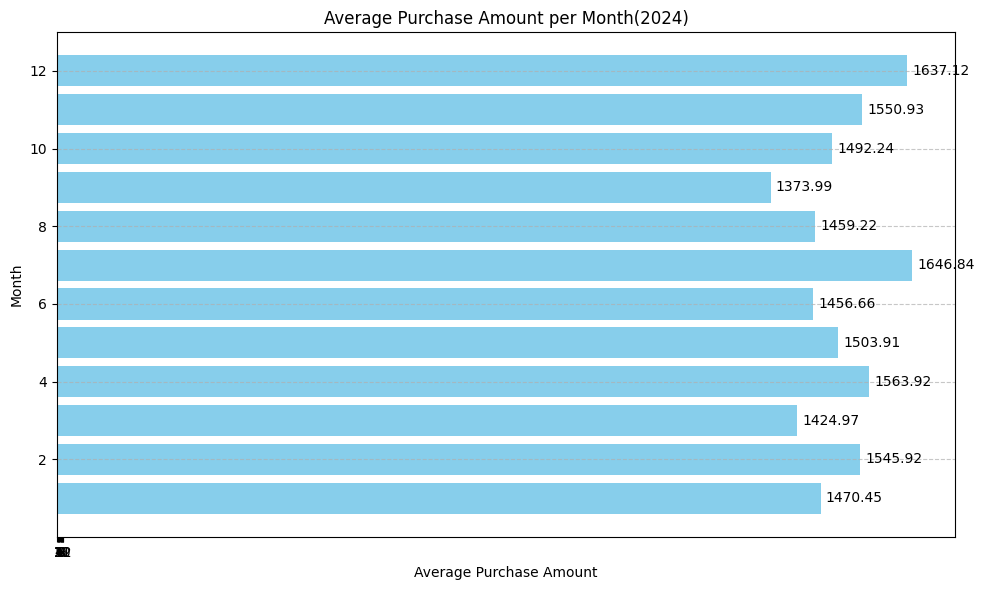

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Purchase_Date' is a datetime column in your DataFrame
df['Purchase_Year'] = pd.to_datetime(df['Purchase_Date']).dt.year  # Extract purchase year
desired_year = 2024  # Change to your desired year

filtered_df = df[df['Purchase_Year'] == desired_year]  # Filter data for the desired year

# Now calculate the monthly average for the filtered data
filtered_df['Month'] = pd.to_datetime(filtered_df['Purchase_Date']).dt.month
filtered_df['Average_Purchase_Amount_per_Month'] = filtered_df.groupby('Month')['Purchase_Amount'].transform('mean')

monthly_avg_purchase = filtered_df.groupby('Month')['Average_Purchase_Amount_per_Month'].mean()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
bars=plt.barh(monthly_avg_purchase.index, monthly_avg_purchase.values, color='skyblue')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Month')
plt.title('Average Purchase Amount per Month(2024)')
plt.xticks(monthly_avg_purchase.index)  # Set x-axis ticks to month numbers
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
# Add value labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')
plt.tight_layout()
plt.show()

<ipython-input-12-92b22a38a691>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = pd.to_datetime(filtered_df['Purchase_Date']).dt.month
<ipython-input-12-92b22a38a691>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Average_Purchase_Amount_per_Month'] = filtered_df.groupby('Month')['Purchase_Amount'].transform('mean')


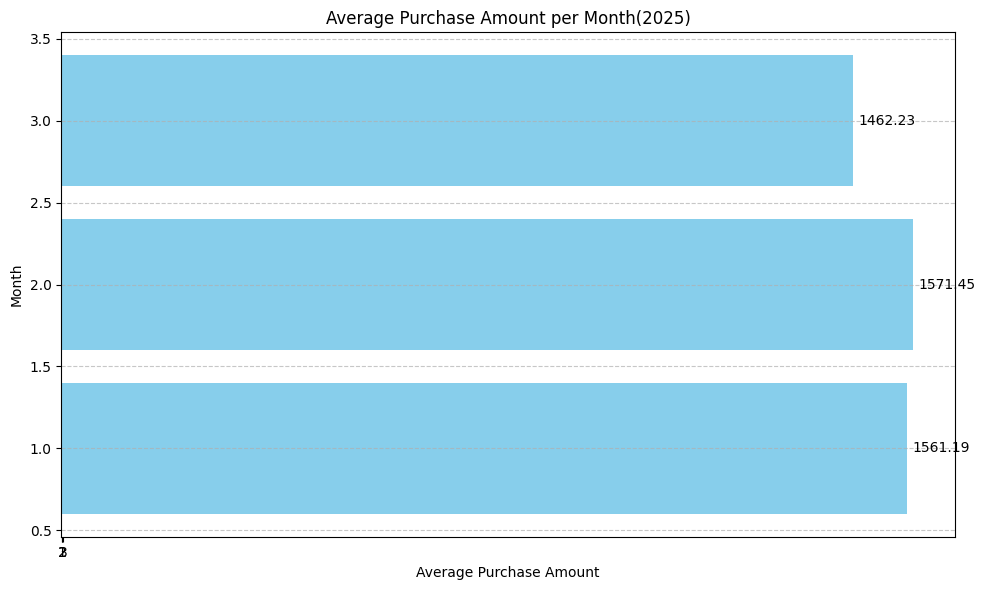

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Purchase_Date' is a datetime column in your DataFrame
df['Purchase_Year'] = pd.to_datetime(df['Purchase_Date']).dt.year  # Extract purchase year
desired_year = 2025  # Change to your desired year

filtered_df = df[df['Purchase_Year'] == desired_year]  # Filter data for the desired year

# Now calculate the monthly average for the filtered data
filtered_df['Month'] = pd.to_datetime(filtered_df['Purchase_Date']).dt.month
filtered_df['Average_Purchase_Amount_per_Month'] = filtered_df.groupby('Month')['Purchase_Amount'].transform('mean')

monthly_avg_purchase = filtered_df.groupby('Month')['Average_Purchase_Amount_per_Month'].mean()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
bars=plt.barh(monthly_avg_purchase.index, monthly_avg_purchase.values, color='skyblue')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Month')
plt.title('Average Purchase Amount per Month(2025)')
plt.xticks(monthly_avg_purchase.index)  # Set x-axis ticks to month numbers
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
# Add value labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')
plt.tight_layout()
plt.show()

In [ ]:
# Extract purchase year
#df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])  # Convert 'Purchase_Date' to datetime
#df['Purchase_Year'] = df['Purchase_Date'].dt.year

# Filter data for the desired years
#filtered_df = df[df['Purchase_Year'].isin([2023, 2024, 2025])]

# Get the current year
#current_year = df['Purchase_Year'].max()

# Categorize purchases as current or previous year
#df['Purchase_Period'] = df['Purchase_Year'].apply(lambda year: 'Current Year' if year == current_year else 'Previous Year')

# Group by Category and Purchase_Period and calculate total purchase amount
#category_purchase_amount = filtered_df.groupby(['Category', 'Purchase_Period'])['Purchase_Amount'].sum().reset_index()

# Get unique categories
#categories = category_purchase_amount['Category'].unique()

# Create a bar chart
#import seaborn as sns # make sure to import seaborn
#import matplotlib.pyplot as plt # and matplotlib

#plt.figure(figsize=(12, 6))
#sns.barplot(x='Category', y='Purchase_Amount', hue='Purchase_Period', data=category_purchase_amount, palette='viridis')
#plt.xlabel('Product Category')
#plt.ylabel('Total Purchase Amount')
#plt.title('Comparison of Current and Previous Year Purchases by Product Category')
#plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
#plt.show()""

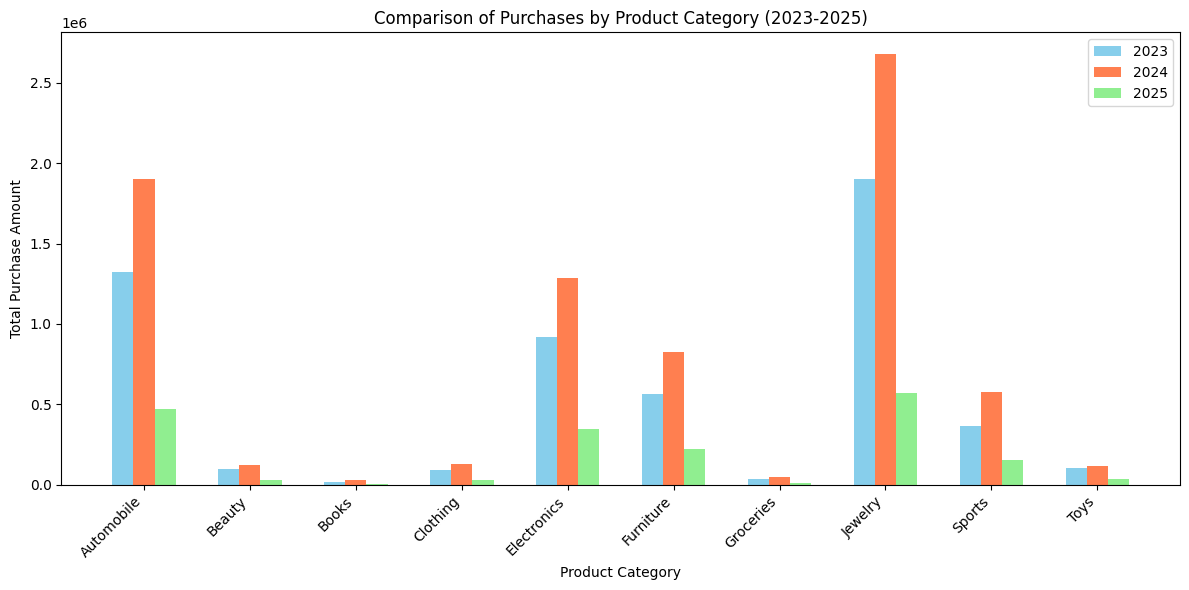

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extract purchase year
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Purchase_Year'] = df['Purchase_Date'].dt.year

# Filter data for the desired years
years = [2023, 2024, 2025]
filtered_df = df[df['Purchase_Year'].isin(years)]

# Group by Category and Purchase_Year and calculate total purchase amount
category_purchase_amount = filtered_df.groupby(['Category', 'Purchase_Year'])['Purchase_Amount'].sum().reset_index()

# Get unique categories
categories = category_purchase_amount['Category'].unique()

# Set bar width
bar_width = 0.2

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors for each year
colors = ['skyblue', 'coral', 'lightgreen']  # Example colors

# Create bars for each year
for i, year in enumerate(years):
    year_data = category_purchase_amount[category_purchase_amount['Purchase_Year'] == year]
    x_positions = np.arange(len(categories)) + (i * bar_width)  # Adjust bar positions
    ax.bar(x_positions, year_data['Purchase_Amount'], width=bar_width, label=str(year), color=colors[i])

# Set chart properties
ax.set_xlabel('Product Category')
ax.set_ylabel('Total Purchase Amount')
ax.set_title('Comparison of Purchases by Product Category (2023-2025)')
ax.set_xticks(np.arange(len(categories)) + bar_width)  # Adjust x-tick positions
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# Generate sample data (replace with your actual data)
purchase_amounts = np.random.exponential(scale=1000, size=10000)
purchase_amounts = np.clip(purchase_amounts, 0, 10000)  # Limit values to 10,000
df1 = pd.DataFrame({'Purchase Amount': purchase_amounts})

# Create interactive histogram
fig = px.histogram(df1, x='Purchase Amount', nbins=50, title='Interactive Distribution of Purchase Amount',
                    labels={'Purchase Amount': 'Purchase Amount'}, opacity=0.7, color_discrete_sequence=['skyblue'])

fig.update_layout(
    xaxis_title='Purchase Amount',
    yaxis_title='Frequency',
    bargap=0.05
)

fig.show()


Analyze the distribution of `Age` and `Gender` by calculating descriptive statistics for age and visualizing its distribution using a histogram and box plot. Also, calculate the proportion of male and female customers.



Gender Proportion:
 Gender
Male      54.76
Female    45.24
Name: proportion, dtype: float64


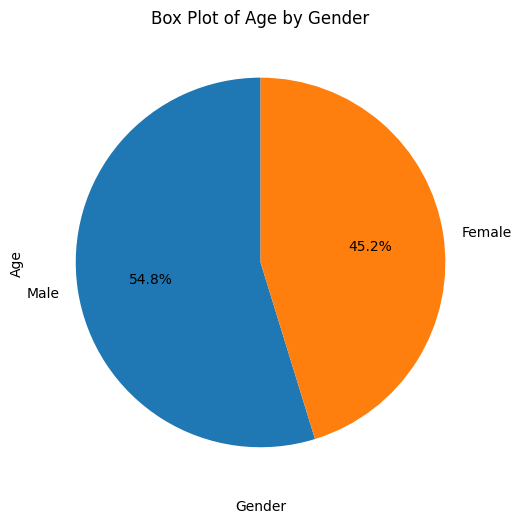

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt




# Assuming 'df_retail' is the original DataFrame with 'Gender' column
gender_counts = df_retail['Gender'].value_counts(normalize=True) * 100
print("Gender Proportion:\n", gender_counts)

# Create a box plot of Age, grouped by Gender
plt.figure(figsize=(8, 6))
plt.pie(gender_counts.values , labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Box Plot of Age by Gender')
plt.show()

Age Statistics:
 count    10000.000000
mean        41.054000
std         13.484104
min         18.000000
25%         30.000000
50%         41.000000
75%         53.000000
max         64.000000
Name: Age, dtype: float64
Age Proportion:
 Age
18    201
19    221
20    206
21    212
22    204
23    212
24    188
25    214
26    203
27    201
28    212
29    222
30    225
31    197
32    215
33    207
34    234
35    228
36    205
37    214
38    223
39    219
40    235
41    216
42    221
43    242
44    176
45    233
46    225
47    203
48    177
49    219
50    208
51    218
52    226
53    209
54    223
55    204
56    227
57    212
58    191
59    222
60    190
61    210
62    231
63    191
64    228
Name: count, dtype: int64


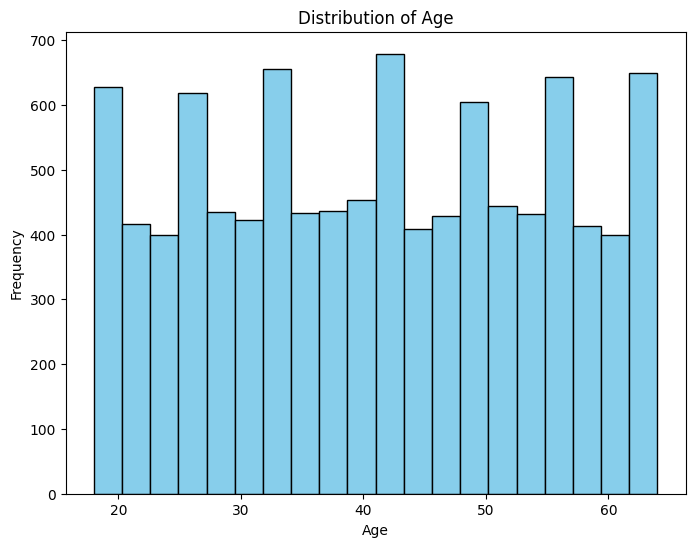

In [ ]:
# Calculate descriptive statistics for Age.
age_stats = df_retail['Age'].describe()
print("Age Statistics:\n", age_stats)

# Analyze the proportion of male and female customers.
age_counts = df_retail['Age'].value_counts().sort_index()
print("Age Proportion:\n", age_counts)

# Create a histogram of Age.
plt.figure(figsize=(8, 6))
plt.hist(df_retail['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()



Analyze the distribution of `Category` by calculating the frequency of each product category and visualizing it using a bar chart. Identify the most and least popular product categories.



Product Category Frequencies:
 Category
Sports         1070
Furniture      1041
Jewelry        1040
Books          1039
Automobile     1003
Toys            988
Beauty          983
Clothing        953
Electronics     947
Groceries       936
Name: count, dtype: int64


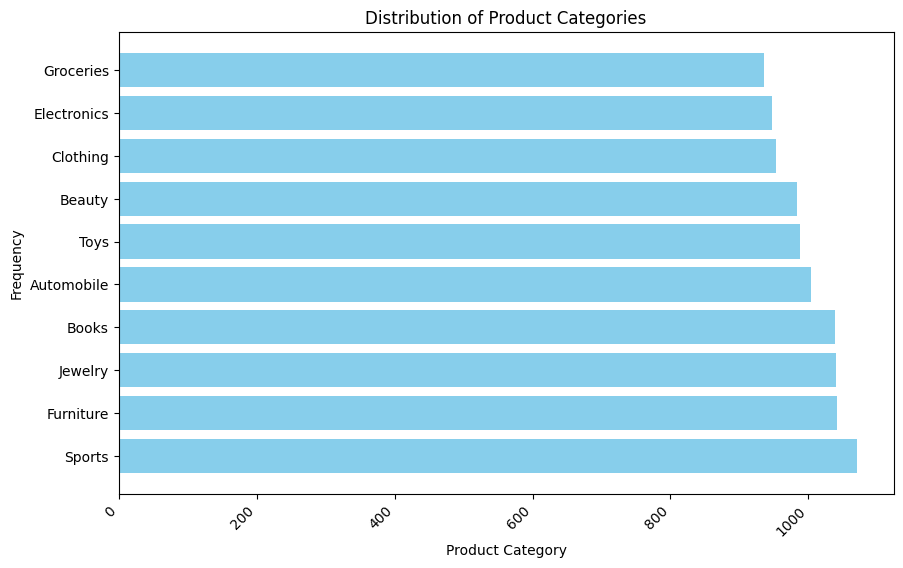

Most Popular Product Category: Sports
Least Popular Product Category: Groceries


In [ ]:
# Calculate the frequency of each product category.
category_counts = df_retail['Category'].value_counts()
print("Product Category Frequencies:\n", category_counts)

# Visualize the distribution of product categories using a bar chart.
plt.figure(figsize=(10, 6))
plt.barh(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Identify the most and least popular product categories.
most_popular_category = category_counts.idxmax()
least_popular_category = category_counts.idxmin()
print(f"Most Popular Product Category: {most_popular_category}")
print(f"Least Popular Product Category: {least_popular_category}")

Analyze the distribution of `City` by calculating the frequency of each city and visualizing it using a bar chart. Identify the cities with the highest and lowest number of purchases.



City Purchase Frequencies:
 City
Miami            1068
Chicago          1024
San Francisco    1008
Houston          1006
Boston            993
Denver            991
Dallas            984
Seattle           983
New York          980
Los Angeles       963
Name: count, dtype: int64


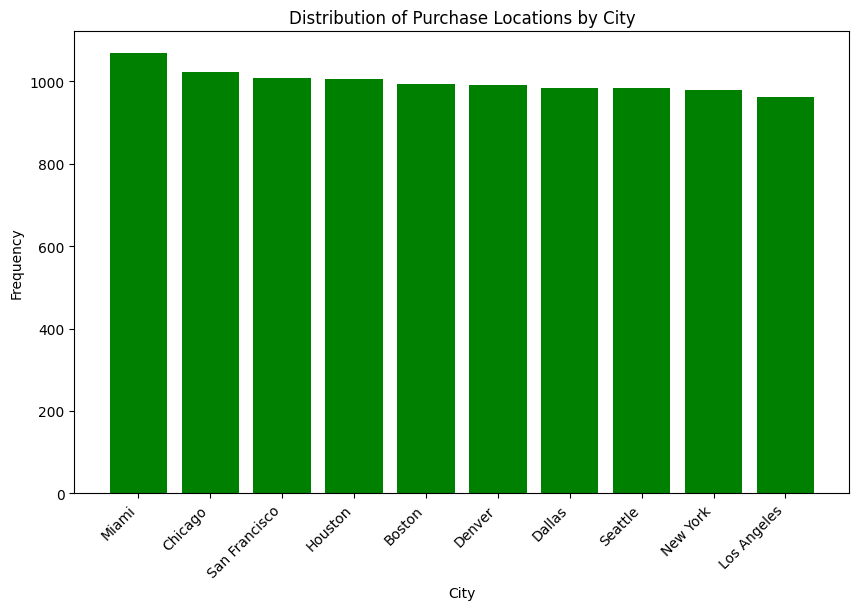

City with Highest Number of Purchases: Miami
City with Lowest Number of Purchases: Los Angeles


In [ ]:
# Calculate the frequency of each city.
city_counts = df_retail['City'].value_counts()
print("City Purchase Frequencies:\n", city_counts)

# Visualize the distribution of cities using a bar chart.
plt.figure(figsize=(10, 6))
plt.bar(city_counts.index, city_counts.values, color='green')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Locations by City')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Identify the cities with the highest and lowest number of purchases.
highest_purchase_city = city_counts.idxmax()
lowest_purchase_city = city_counts.idxmin()
print(f"City with Highest Number of Purchases: {highest_purchase_city}")
print(f"City with Lowest Number of Purchases: {lowest_purchase_city}")

## Data visualization

Visualize the relationships between variables in the dataset stored in `df`.


Visualize the relationships between variables as requested in the subtask instructions, starting with a scatter plot and bar plot both represented relationship between Purchase_Amount and Age, using color to represent Gender.



<ipython-input-38-d4b2a72562ba>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



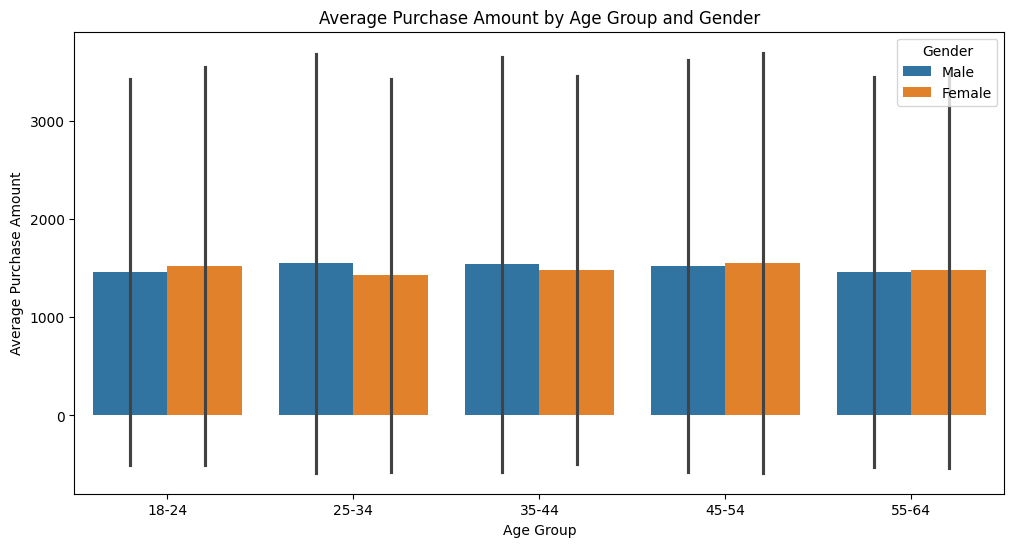

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for cut function


# Define age group bins and labels
age_bins = [18, 25, 35, 45, 55, 65]  # Example bins
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

# Create the 'Age_Group' column using pd.cut
df_retail['Age_Group'] = pd.cut(df_retail['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the average Purchase_Amount for each Age Group and Gender
average_purchase = df_retail.groupby(['Age_Group', 'Gender'])['Purchase_Amount'].mean().reset_index()

# Create a bar chart with error bars
plt.figure(figsize=(12, 6))
sns.barplot(x='Age_Group', y='Purchase_Amount', hue='Gender', data=df_retail, errorbar='sd')  # 'sd' for standard deviation error bars
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Age Group and Gender')
plt.show()

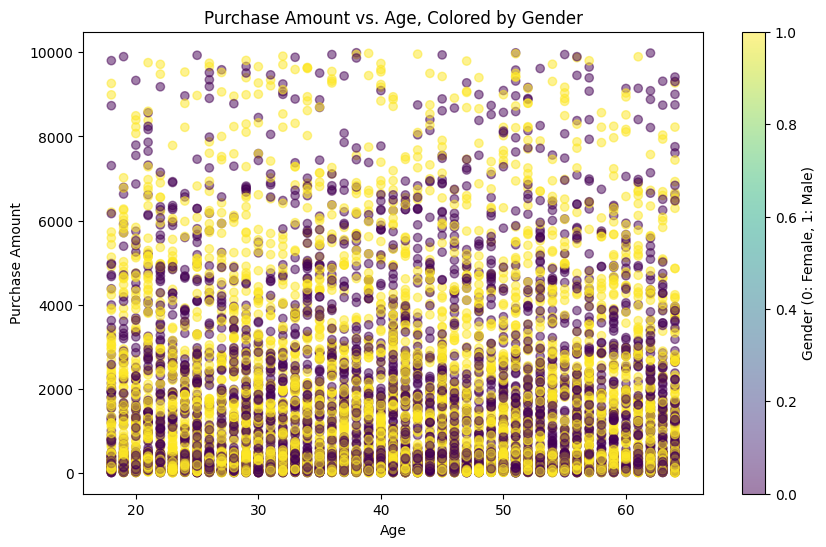

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Purchase_Amount vs. Age, colored by Gender
plt.figure(figsize=(10, 6))
plt.scatter(df_retail['Age'], df_retail['Purchase_Amount'], c=[1 if gender == 'Male' else 0 for gender in df_retail['Gender']], cmap='viridis', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.title('Purchase Amount vs. Age, Colored by Gender')
plt.colorbar(label='Gender (0: Female, 1: Male)')
plt.show()

Creates a histogram for each product category, allowing for a direct comparison of the distributions. You can see the frequency of purchases within different price ranges for each category.

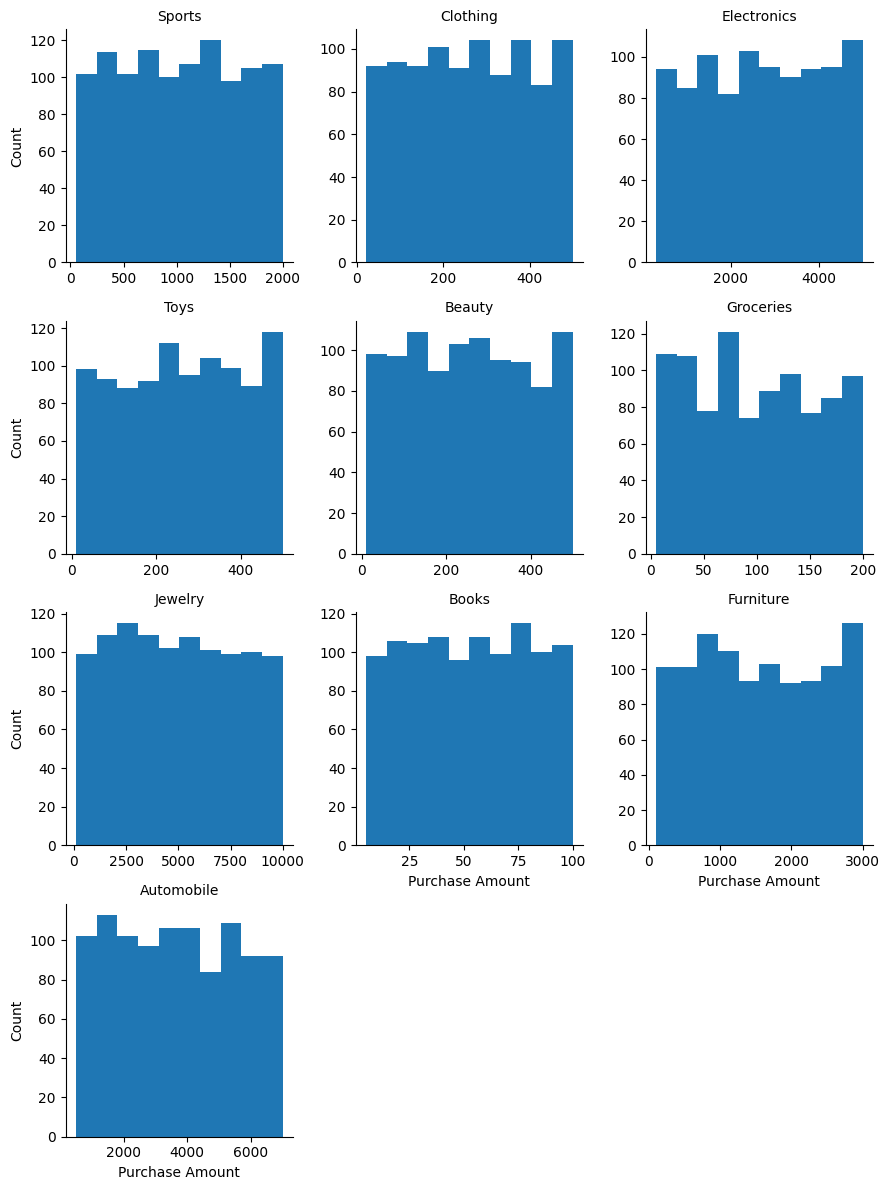

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df_retail, col='Category', col_wrap=3, sharex=False, sharey=False)
g.map(plt.hist, 'Purchase_Amount')
g.set_titles('{col_name}')
g.set_axis_labels('Purchase Amount', 'Count')
plt.tight_layout()
plt.show()

Continue visualizing the relationships between variables by creating a box plot to compare the Purchase_Amount distribution across different Category values.

<Figure size 1200x600 with 0 Axes>

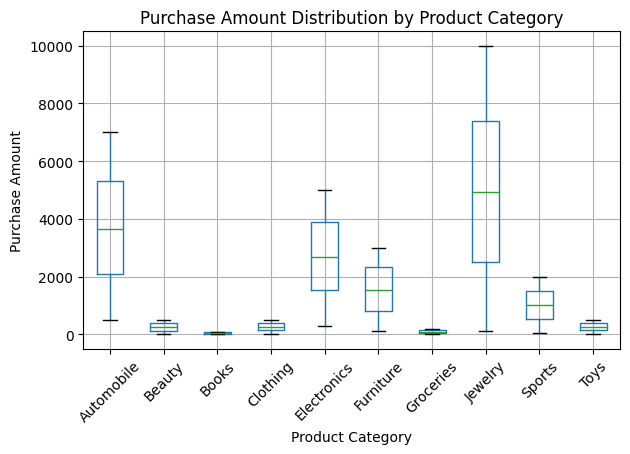

In [ ]:
import matplotlib.pyplot as plt

# Box plot of Purchase_Amount across different Category values
plt.figure(figsize=(12, 6))
df_retail.boxplot(column='Purchase_Amount', by='Category', rot=45)
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')
plt.title('Purchase Amount Distribution by Product Category')
plt.suptitle('')  # Remove the default title generated by boxplot
plt.tight_layout()
plt.show()

Continue visualizing the relationships between variables by creating a bar chart to visualize the total Purchase_Amount for each City.



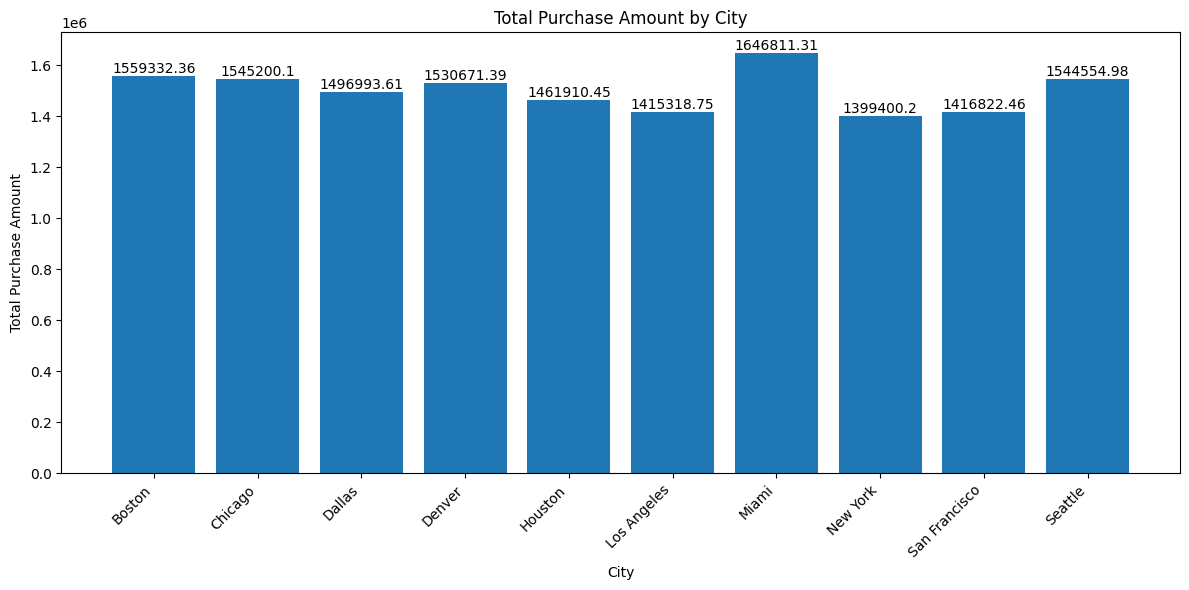

In [ ]:
import matplotlib.pyplot as plt

# Group by City and calculate the total Purchase_Amount for each city
city_purchase_amount = df_retail.groupby('City')['Purchase_Amount'].sum()

# Create a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(city_purchase_amount.index, city_purchase_amount.values)
plt.xlabel('City')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by City')
# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 2), ha='center', va='bottom')
    # Adjust 'yval + 50' for vertical positioning of the label

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Create a heatmap to show the correlation between numerical variables in the dataset, which can reveal potential linear relationships between variables.



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['Gender', 'City', 'Category']:
    df_retail[column] = encoder.fit_transform(df_retail[column])



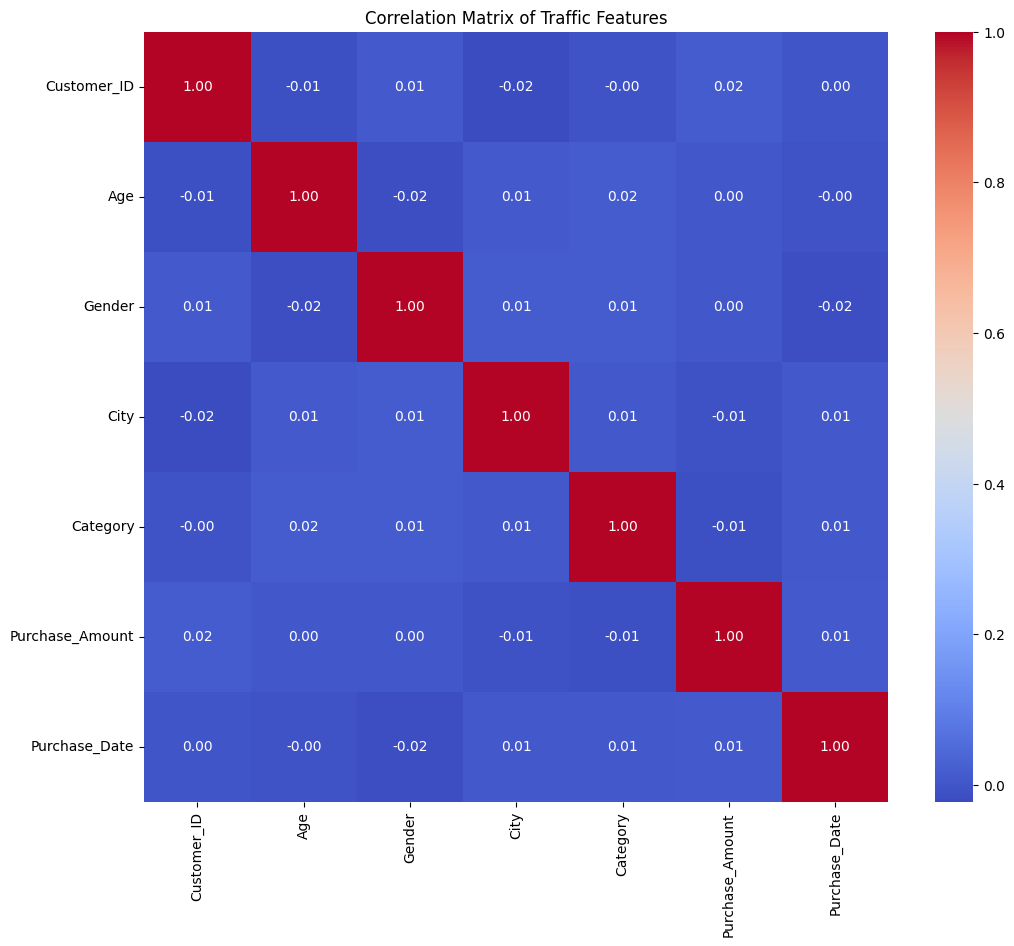

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_retail[['Customer_ID', 'Age', 'Gender', 'City', 'Category', 'Purchase_Amount', 'Purchase_Date']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Traffic Features')
plt.show()

Visulize the purchase trend by monthly and yearly.

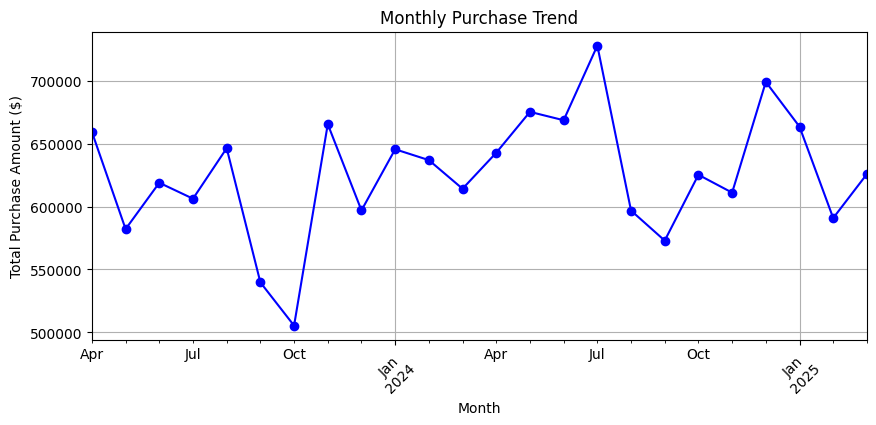

In [ ]:
# Purchase trends over time (Monthly)
df_retail["Purchase_Month"] = df_retail["Purchase_Date"].dt.to_period("M")
monthly_trend = df_retail.groupby("Purchase_Month")["Purchase_Amount"].sum()

plt.figure(figsize=(10, 4))
monthly_trend.plot(kind="line", marker="o", color="b", linestyle="-")
plt.title("Monthly Purchase Trend")
plt.xlabel("Month")
plt.ylabel("Total Purchase Amount ($)")
plt.grid()
plt.xticks(rotation=45)
plt.show()

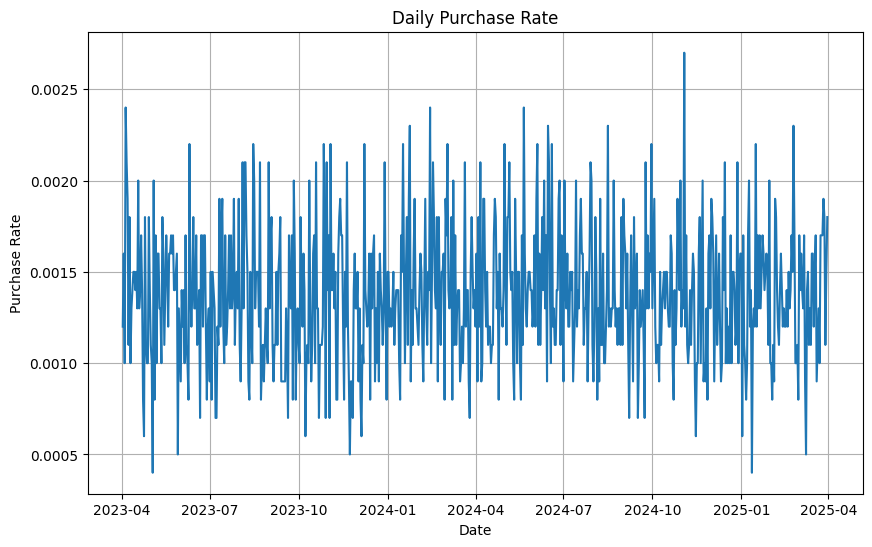

In [ ]:
df_retail['Purchase_Date'] = pd.to_datetime(df_retail['Purchase_Date'])  # Ensure 'Purchase_Date' is in datetime format
df_retail['Purchase_Day'] = df_retail['Purchase_Date'].dt.date # Extract the date partdaily_purchase_rate = df_retail.groupby('Purchase_Day')['Customer_ID'].count() # Count unique customers per day
daily_purchase_rate = df_retail.groupby('Purchase_Day')['Customer_ID'].count() # Count unique customers per day
daily_purchase_rate = daily_purchase_rate / df_retail['Customer_ID'].nunique() # Normalize by total unique customers
import matplotlib.pyplot as plt

daily_purchase_rate.plot(kind='line', figsize=(10, 6))
plt.title('Daily Purchase Rate')
plt.xlabel('Date')
plt.ylabel('Purchase Rate')
plt.grid(True)
plt.show()

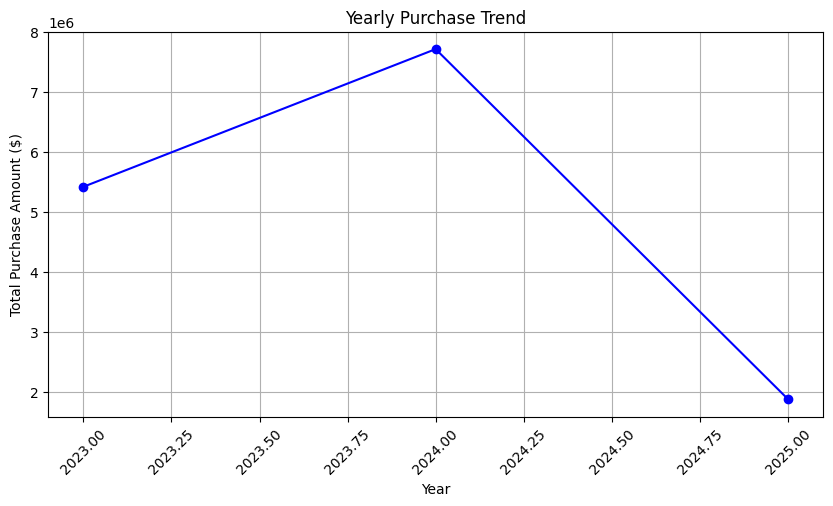

In [ ]:
# Yearly Purchase Trend Analysis
df_retail["Purchase_Year"] = df_retail["Purchase_Date"].dt.year
yearly_trend = df_retail.groupby("Purchase_Year")["Purchase_Amount"].sum()

# Plot yearly trend
plt.figure(figsize=(10, 5))
yearly_trend.plot(kind="line", marker="o", color="b", linestyle="-")
plt.title("Yearly Purchase Trend")
plt.xlabel("Year")
plt.ylabel("Total Purchase Amount ($)")
plt.grid()
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pickle
# Create an empty dictionary to store EDA results
eda_results = {}

# Assuming 'eda_results' is a dictionary containing your EDA details
with open('eda_details.pkl', 'wb') as f:
    pickle.dump(eda_results, f)
    print("EDA results saved to 'eda_details.pkl'")

EDA results saved to 'eda_details.pkl'


## Data analysis

### Subtask:
Analyze product purchase frequency and city-wise distribution.


In [3]:
# Calculate the frequency of each product category
category_counts = df['Category'].value_counts()

# Identify the top 3 most frequent categories
top_3_products = category_counts.nlargest(3).index.tolist()

# Create a dictionary to store the city with the highest purchase frequency for each top product
city_product_frequency = {}

# Iterate through the top 3 product categories
for product in top_3_products:
    # Filter the DataFrame for the current product category
    product_df = df[df['Category'] == product]

    # Group by city and count purchases
    city_counts = product_df.groupby('City')['Customer_ID'].count()

    # Find the city with the maximum purchase count
    max_city = city_counts.idxmax()

    # Store the result in the dictionary
    city_product_frequency[product] = max_city

# Print the results
print("Top 3 product categories:", top_3_products)
print("City with highest purchase frequency for each product:", city_product_frequency)

Top 3 product categories: ['Sports', 'Furniture', 'Jewelry']
City with highest purchase frequency for each product: {'Sports': 'Dallas', 'Furniture': 'Houston', 'Jewelry': 'Miami'}


## Data visualization

### Subtask:
Visualize the frequency of the top 3 product categories and their distribution across cities.


**Reasoning**:
Visualize the frequency of the top 3 product categories and their city-wise distribution using bar charts.



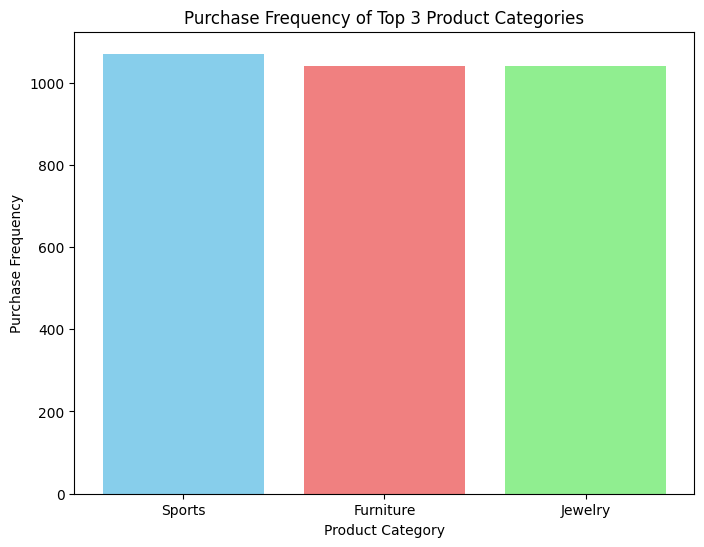

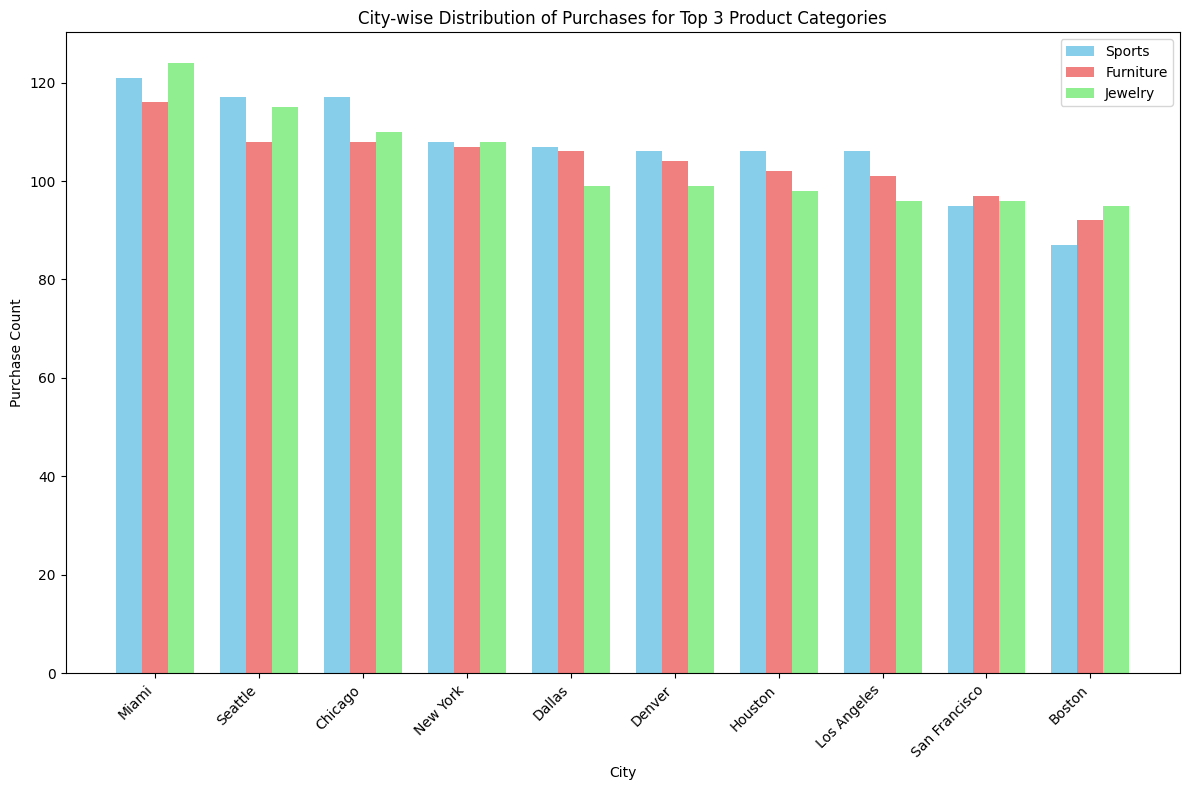

In [4]:
import matplotlib.pyplot as plt

# 1. Frequency of top 3 product categories
top_3_products = ['Sports', 'Furniture', 'Jewelry']
category_counts = df['Category'].value_counts()
top_3_counts = category_counts[top_3_products]

plt.figure(figsize=(8, 6))
plt.bar(top_3_counts.index, top_3_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Product Category")
plt.ylabel("Purchase Frequency")
plt.title("Purchase Frequency of Top 3 Product Categories")
plt.show()


# 2. City-wise distribution of purchases for top 3 categories
plt.figure(figsize=(12, 8))

for i, product in enumerate(top_3_products):
    product_df = df[df['Category'] == product]
    city_counts = product_df['City'].value_counts()

    # Adjust x-axis positions for grouped bars
    x_pos = [j + i * 0.25 for j in range(len(city_counts))]

    plt.bar(x_pos, city_counts.values, width=0.25, label=product, color=['skyblue', 'lightcoral', 'lightgreen'][i])

plt.xticks([j + 0.25 for j in range(len(city_counts))], city_counts.index, rotation=45, ha='right')
plt.xlabel("City")
plt.ylabel("Purchase Count")
plt.title("City-wise Distribution of Purchases for Top 3 Product Categories")
plt.legend()
plt.tight_layout()
plt.show()